# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

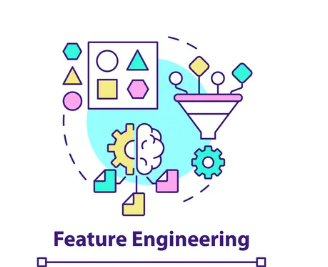

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



Although the datatype for the dependents feaure is object, it can be considered as a numerical feature since the feature has numeric inputs ranging from 0 till n. 

In [1]:
# Write your solution here
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('loan_train.csv')
n_ndf = df.select_dtypes(include = 'number')
impute = SimpleImputer(strategy='mean')
ndf = impute.fit_transform(n_ndf)
ndf = pd.DataFrame(data = ndf, columns = n_ndf.columns)
ndf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

In [2]:
import matplotlib.pyplot as plt 

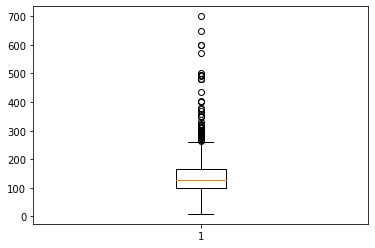

In [3]:
#Write your solution here
plt.boxplot(ndf['LoanAmount'])
plt.show()


In [4]:
Q1 = ndf['LoanAmount'].quantile(0.25)
Q3 = ndf['LoanAmount'].quantile(0.75)
IQR = Q3-Q1
u_limit = Q3+(IQR*1.5)
l_limit = Q1-(IQR*1.5)


In [5]:
ndf1 = ndf[(ndf.LoanAmount > l_limit) & (ndf.LoanAmount < u_limit)]
outliers = ndf.index.difference(ndf1.index)
ndf1.shape

(573, 5)

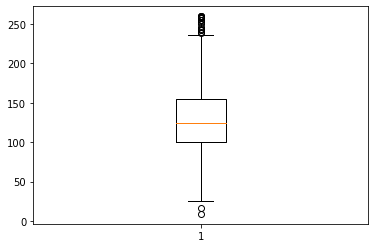

In [6]:
plt.boxplot(ndf1['LoanAmount'])
plt.show()

#Using Standard Deviation 


In [7]:
ndf1.shape

(573, 5)

In [8]:
std = df.Loan_Amount_Term.std()
mean = df.Loan_Amount_Term.mean()
u_limit = mean + (3 * std)
l_limit = mean - (3 * std)
ndf2 = ndf1[(ndf1.Loan_Amount_Term > l_limit) & (ndf1.Loan_Amount_Term < u_limit)]
ndf2.shape

(561, 5)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

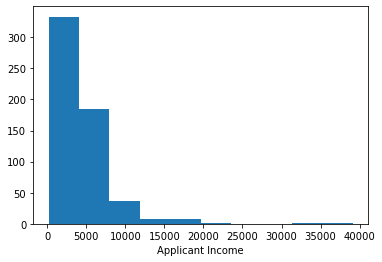

In [9]:
# Write your solution here
plt.hist(ndf1.ApplicantIncome)
plt.xlabel('Applicant Income')
plt.show()


Logarithmic Transformation

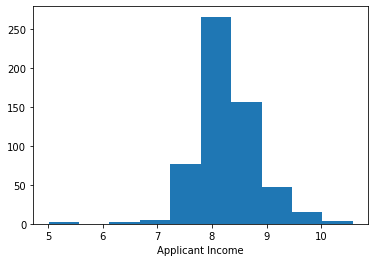

In [10]:
import numpy as np
x = np.log(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

Squareroot Transformation

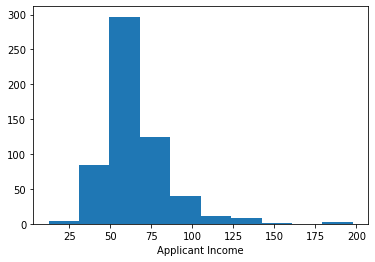

In [11]:
x= np.sqrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

Cuberoot Transformation

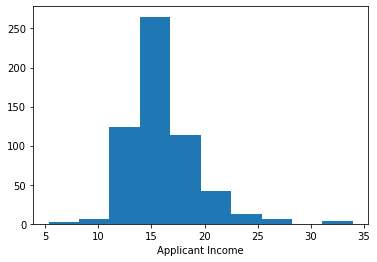

In [12]:
x = np.cbrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

Reciprocal Transformation

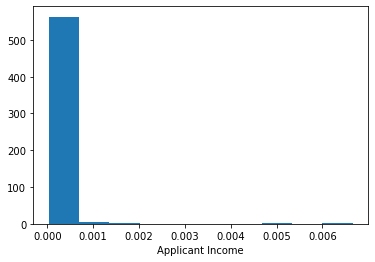

In [13]:
x= np.reciprocal(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

Exponentiation Transformation

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [1.3937095806663797e+65, inf] is not finite

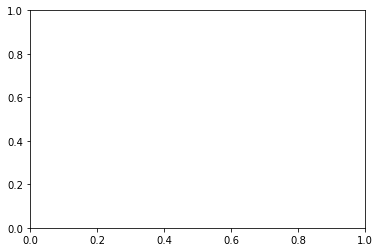

In [14]:
x= np.exp(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

For the feature ApplicantIncome, we can use the logarithmic transformation as it makes the ditribution more normal compared to other transformation methods. 

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [15]:
# Write your solution here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
ndf3 = scaler.fit_transform(ndf)
ndf3 = pd.DataFrame(ndf3, columns = n_ndf.columns)
ndf3

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.198860          0.743590   
1           0.054830           0.036192    0.172214          0.743590   
2           0.035250           0.000000    0.082489          0.743590   
3           0.030093           0.056592    0.160637          0.743590   
4           0.072356           0.000000    0.191027          0.743590   
..               ...                ...         ...               ...   
609         0.034014           0.000000    0.089725          0.743590   
610         0.048930           0.000000    0.044863          0.358974   
611         0.097984           0.005760    0.353111          0.743590   
612         0.091936           0.000000    0.257598          0.743590   
613         0.054830           0.000000    0.179450          0.743590   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndf2 = scaler.fit_transform(ndf1)
ndf2 = pd.DataFrame(ndf2, columns = n_ndf.columns)
ndf2


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.328911          -0.630154    0.370646          0.278520   
1          -0.018351           0.012474   -0.025618          0.278520   
2          -0.452565          -0.630154   -1.359976          0.278520   
3          -0.566948           0.374698   -0.197794          0.278520   
4           0.370330          -0.630154    0.254166          0.278520   
..               ...                ...         ...               ...   
568        -0.479995          -0.630154   -1.252367          0.278520   
569        -0.149191          -0.630154   -1.919546         -2.501832   
570         0.938677          -0.527879    2.664619          0.278520   
571         0.804545          -0.630154    1.244174          0.278520   
572        -0.018351          -0.630154    0.081991          0.278520   

     Credit_History  
0          0.452826  
1          0.452826  
2          0.452826  
3          0.452826  
4          0.452826  
..              ...  
568        0.452826  
569        0.452826  
570        0.452826  
571        0.452826  
572       -2.395324  

[573 rows x 5 columns]

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [17]:
# Write your solution here
df1 = pd.read_csv('loan_train.csv')
categorical_cols =  df.select_dtypes(include = ['object','bool'])
impute = SimpleImputer(strategy='most_frequent')
data = impute.fit_transform(categorical_cols)
cdf1 = pd.DataFrame(data, columns=categorical_cols.columns)
cdf1.drop(columns = 'Loan_ID', inplace =True)
cdf1.drop(outliers, axis=0, inplace=True)
cdf1.shape
cdf1.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [18]:
categorical_columns = ['Gender','Married','Self_Employed']
cdf2= cdf1[categorical_columns]
cdf2 = pd.get_dummies(cdf2)
cdf2.isna().sum()

Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
Self_Employed_No     0
Self_Employed_Yes    0
dtype: int64

In [19]:
cdf1[categorical_columns]

Gender Married Self_Employed
0      Male      No            No
1      Male     Yes            No
2      Male     Yes           Yes
3      Male     Yes            No
4      Male      No            No
..      ...     ...           ...
609  Female      No            No
610    Male     Yes            No
611    Male     Yes            No
612    Male     Yes            No
613  Female      No           Yes

[573 rows x 3 columns]

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
nominal =  ohe.fit_transform(cdf1[categorical_columns]).toarray()
nominaldf = pd.DataFrame(nominal, columns = ohe.get_feature_names_out())
nominaldf.shape

(573, 6)

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
ordinal = oe.fit_transform(cdf1[['Property_Area','Education','Dependents']])
cdf3 = pd.DataFrame(ordinal, columns = ['Property_Area','Education','Dependents'])
cdf3.shape

(573, 3)

In [22]:
cdf = pd.concat([nominaldf,cdf3], axis=1)
cdf

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0.0          1.0         1.0          0.0               1.0   
1              0.0          1.0         0.0          1.0               1.0   
2              0.0          1.0         0.0          1.0               0.0   
3              0.0          1.0         0.0          1.0               1.0   
4              0.0          1.0         1.0          0.0               1.0   
..             ...          ...         ...          ...               ...   
568            1.0          0.0         1.0          0.0               1.0   
569            0.0          1.0         0.0          1.0               1.0   
570            0.0          1.0         0.0          1.0               1.0   
571            0.0          1.0         0.0          1.0               1.0   
572            1.0          0.0         1.0          0.0               0.0   

     Self_Employed_Yes  Property_Area  Education  Dependents  
0                  0.0            2.0        0.0         0.0  
1                  0.0            0.0        0.0         1.0  
2                  1.0            2.0        0.0         0.0  
3                  0.0            2.0        1.0         0.0  
4                  0.0            2.0        0.0         0.0  
..                 ...            ...        ...         ...  
568                0.0            0.0        0.0         0.0  
569                0.0            0.0        0.0         3.0  
570                0.0            2.0        0.0         1.0  
571                0.0            2.0        0.0         2.0  
572                1.0            1.0        0.0         0.0  

[573 rows x 9 columns]

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [23]:
#Write your solution here
alldf = pd.concat([cdf, ndf2], axis=1)
alldf

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0.0          1.0         1.0          0.0               1.0   
1              0.0          1.0         0.0          1.0               1.0   
2              0.0          1.0         0.0          1.0               0.0   
3              0.0          1.0         0.0          1.0               1.0   
4              0.0          1.0         1.0          0.0               1.0   
..             ...          ...         ...          ...               ...   
568            1.0          0.0         1.0          0.0               1.0   
569            0.0          1.0         0.0          1.0               1.0   
570            0.0          1.0         0.0          1.0               1.0   
571            0.0          1.0         0.0          1.0               1.0   
572            1.0          0.0         1.0          0.0               0.0   

     Self_Employed_Yes  Property_Area  Education  Dependents  ApplicantIncome  \
0                  0.0            2.0        0.0         0.0         0.328911   
1                  0.0            0.0        0.0         1.0        -0.018351   
2                  1.0            2.0        0.0         0.0        -0.452565   
3                  0.0            2.0        1.0         0.0        -0.566948   
4                  0.0            2.0        0.0         0.0         0.370330   
..                 ...            ...        ...         ...              ...   
568                0.0            0.0        0.0         0.0        -0.479995   
569                0.0            0.0        0.0         3.0        -0.149191   
570                0.0            2.0        0.0         1.0         0.938677   
571                0.0            2.0        0.0         2.0         0.804545   
572                1.0            1.0        0.0         0.0        -0.018351   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  
0            -0.630154    0.370646          0.278520        0.452826  
1             0.012474   -0.025618          0.278520        0.452826  
2            -0.630154   -1.359976          0.278520        0.452826  
3             0.374698   -0.197794          0.278520        0.452826  
4            -0.630154    0.254166          0.278520        0.452826  
..                 ...         ...               ...             ...  
568          -0.630154   -1.252367          0.278520        0.452826  
569          -0.630154   -1.919546         -2.501832        0.452826  
570          -0.527879    2.664619          0.278520        0.452826  
571          -0.630154    1.244174          0.278520        0.452826  
572          -0.630154    0.081991          0.278520       -2.395324  

[573 rows x 14 columns]

In [24]:
alldf.shape

(573, 14)

# <center>THANK YOU

In [26]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(alldf, cdf1.Loan_Status)

LogisticRegression()

In [28]:
y2_pred = lg.predict(alldf.head())
y2_pred

array(['Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [30]:
cdf1.head()

Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y